# Test PPO agent in pendulum environment

In [1]:
import numpy as np
import gym
import sys
import torch

from ppo_agent import PPO_agent

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
## Explore environment
env = gym.make('Pendulum-v0')
print('### Env Name ######', env.unwrapped.spec.id)

obs_space = env.observation_space

print('###### Observation space ####### \n', obs_space)

state_size = env.observation_space.shape[-1]

print('###### Size of observation space ####### \n', state_size)

act_space = env.action_space

print('###### Action space ####### \n', act_space)

act_size = env.action_space.shape[-1]

print('###### Number of actions ####### \n', act_size)

### Env Name ###### Pendulum-v0
###### Observation space ####### 
 Box(-8.0, 8.0, (3,), float32)
###### Size of observation space ####### 
 3
###### Action space ####### 
 Box(-2.0, 2.0, (1,), float32)
###### Number of actions ####### 
 1


In [3]:
## Define agent
agent = PPO_agent(state_size=state_size, action_size=act_size, seed = 2)

## Function to save in hdf5 file during learning
def save_score(file_name, data):
    # Open data file
    dat_file = h5py.File(file_name, 'a')
    
    # Create datasets for score 
    dat_file.create_dataset('scores', dtype='f', data=data)

In [5]:
def run_ppo(num_iterations = 500, num_trajs = 10, length_traj = 200):
    scores = []
    for k in range(num_iterations):
        ## Data for trajectories
        trajs_states = []
        trajs_acts = []
        all_rews = []
        trajs_log_pol = []
        len_trajs = []
        
        ## Run to collect trajs for a maximum of length_traj
        for i in range(num_trajs):
            ## Episodic data. Keeps track of rewards per traj
            print(f'##### {i}th Traj #####')
            ep_rews = []
            state = env.reset()
            done = False

            for t_traj in range(length_traj):
                env.render()
                
                # Track observations in this batch
                trajs_states.append(state)

                # Calculate action and log policy and perform a step of th env
                action, log_policy = agent.act(state)
                state, reward, done, info = env.step(action)
                ep_rews.append(reward)

                # Track recent reward, action, and action log policy
                trajs_acts.append(action)
                trajs_log_pol.append(log_policy)

                if done:
                    break

            len_trajs.append(1 + t_traj)
            all_rews.append(ep_rews)

        # Reshape data as tensors
        trajs_states = torch.tensor(trajs_states, dtype=torch.float)
        trajs_acts = torch.tensor(trajs_acts, dtype=torch.float)
        trajs_log_pol = torch.tensor(trajs_log_pol, dtype=torch.float)

        # Run step for learning
        agent.step(trajs_states, trajs_acts, trajs_log_pol, all_rews, len_trajs)
        
        # Calculate metrics to print
        avg_iter_lens = np.mean(len_trajs)
        avg_iter_retur = np.mean([np.sum(ep_rews) for ep_rews in all_rews])
        scores.append(avg_iter_retur)
        
        # Print logging statements
        print(flush=True)
        print(f"-------------------- Iteration #{agent.k_step} --------------------", flush=True)
        print(f"Average Episodic Length: {avg_iter_lens}", flush=True)
        print(f"Average Episodic Return: {avg_iter_retur}", flush=True)
        print(f"Timesteps So Far: {agent.t_step}", flush=True)
        print(f"------------------------------------------------------", flush=True)
        print(flush=True)
    return all_rews, scores

In [6]:
all_rews, scores = run_ppo()

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####


<ipython-input-5-a3b9909bdddb>:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  trajs_states = torch.tensor(trajs_states, dtype=torch.float)



-------------------- Iteration #1 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1417.666348277926
Timesteps So Far: 2000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #2 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1215.9768149156605
Timesteps So Far: 4000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #3 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1347.6113047536485
Timesteps So Far: 6000
----


##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #21 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1050.1314893958813
Timesteps So Far: 42000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #22 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1248.3257471658833
Timesteps So Far: 44000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 

##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #40 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1321.330475457636
Timesteps So Far: 80000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #41 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1247.8119340531634
Timesteps So Far: 82000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #42 --------------------
Average Episodic Length: 200.0
Average Episodic Return: 

Timesteps So Far: 118000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #60 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1201.667379289364
Timesteps So Far: 120000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #61 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1212.5100686390501
Timesteps So Far: 122000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th

##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #79 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1268.0364449314511
Timesteps So Far: 158000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #80 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1254.283543367295
Timesteps So Far: 160000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-----


-------------------- Iteration #98 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1293.370630323859
Timesteps So Far: 196000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #99 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1239.0173187381836
Timesteps So Far: 198000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #100 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1305.3736954605997
Timesteps So Far: 2

Timesteps So Far: 234000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #118 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1375.0178462922358
Timesteps So Far: 236000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #119 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1407.471943933774
Timesteps So Far: 238000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3

##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #137 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1216.77970268391
Timesteps So Far: 274000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #138 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1139.6566545636347
Timesteps So Far: 276000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
#####

##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #156 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1168.3915387023656
Timesteps So Far: 312000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #157 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1170.239479313887
Timesteps So Far: 314000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #158 --------------------
Average Episodic Length: 200.0
Average Episodic Ret

Average Episodic Return: -1089.888469654989
Timesteps So Far: 350000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #176 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -981.5311651258893
Timesteps So Far: 352000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #177 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1050.2859627517742
Timesteps So Far: 354000
------------------------------------------------------

##### 0th Traj #####
#####


##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #195 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1024.34872755229
Timesteps So Far: 390000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #196 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1100.0432974289909
Timesteps So Far: 392000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
####

##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #214 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1213.064524911269
Timesteps So Far: 428000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #215 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -986.0579188435861
Timesteps So Far: 430000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #216 --------------------
Average Episodic Length: 200.0


Average Episodic Return: -1069.2052018942097
Timesteps So Far: 466000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #234 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1002.9270241611891
Timesteps So Far: 468000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #235 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -1005.5954892077252
Timesteps So Far: 470000
------------------------------------------------------

##### 0th Traj #####
###

##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #253 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -937.7860481196234
Timesteps So Far: 506000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #254 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -963.1139831592269
Timesteps So Far: 508000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
#####

##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #272 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -864.1541487042316
Timesteps So Far: 544000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #273 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -718.3984787679689
Timesteps So Far: 546000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #274 --------------------
Average Episodic Length: 200.0
Average Episodic Retu

Timesteps So Far: 582000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #292 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -762.5885223636677
Timesteps So Far: 584000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #293 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -685.5295179520665
Timesteps So Far: 586000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3t

##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #311 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -771.2883281702683
Timesteps So Far: 622000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #312 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -654.6676450333707
Timesteps So Far: 624000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

----


-------------------- Iteration #330 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -327.5457475632142
Timesteps So Far: 660000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #331 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -573.3564610385135
Timesteps So Far: 662000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #332 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -707.9993764997533
Timesteps So Far: 6

------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #350 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -380.62279483324403
Timesteps So Far: 700000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #351 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -484.07465766366977
Timesteps So Far: 702000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th 

##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #369 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -444.4190489349743
Timesteps So Far: 738000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #370 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -457.605710893287
Timesteps So Far: 740000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Itera

Average Episodic Length: 200.0
Average Episodic Return: -339.0854677632593
Timesteps So Far: 776000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #389 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -413.9370945948279
Timesteps So Far: 778000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #390 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -406.826072479398
Timesteps So Far: 780000
-----------------------------------------------------


##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #408 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -512.1670159181618
Timesteps So Far: 816000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #409 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -374.19839805234267
Timesteps So Far: 818000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
###

##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #427 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -512.2933633590867
Timesteps So Far: 854000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #428 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -384.6891061607369
Timesteps So Far: 856000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #429 --------------------
Average Episodic Length: 200.0


Average Episodic Return: -393.5747070915028
Timesteps So Far: 892000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #447 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -352.00570733337946
Timesteps So Far: 894000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #448 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -234.93654484497142
Timesteps So Far: 896000
------------------------------------------------------

##### 0th Traj #####
####

##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #466 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -253.12820754282296
Timesteps So Far: 932000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #467 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -362.94491924454246
Timesteps So Far: 934000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
###

##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #485 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -403.8706600547773
Timesteps So Far: 970000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #486 --------------------
Average Episodic Length: 200.0
Average Episodic Return: -338.46522794059547
Timesteps So Far: 972000
------------------------------------------------------

##### 0th Traj #####
##### 1th Traj #####
##### 2th Traj #####
##### 3th Traj #####
##### 4th Traj #####
##### 5th Traj #####
##### 6th Traj #####
##### 7th Traj #####
##### 8th Traj #####
##### 9th Traj #####

-------------------- Iteration #487 --------------------
Average Episodic Length: 200.0
Average Episodic Ret

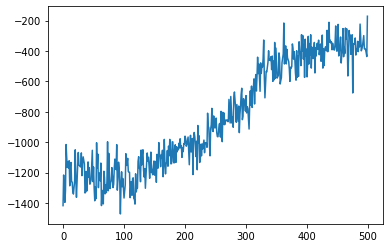

In [7]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(scores)), scores)